In [142]:
import os
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tabulate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from fairlearn.metrics import MetricFrame
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer, precision_score, recall_score

In [2]:
glass = fetch_ucirepo(id=42)
glass_dataset = pd.concat([glass.data.features, glass.data.targets], axis=1)
glass_dataset = glass_dataset.drop_duplicates()
wine = load_wine(as_frame=True).frame

In [3]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(*(wine.iloc[:, :-1], wine.iloc[:, -1]), test_size=0.2, stratify=wine.iloc[:, -1])

## Sanity check


Test results:

Accuracy: 0.9444444444444444

Classification Report for WINE dataset:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      0.93      0.93        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



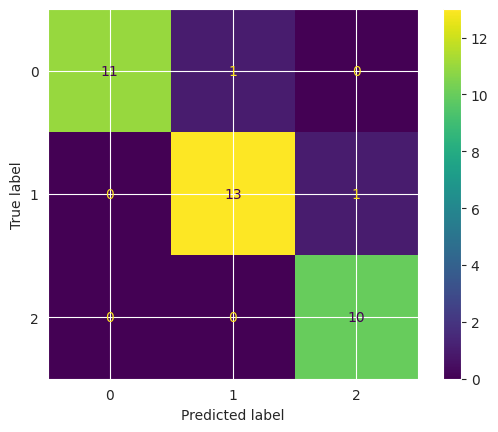

In [4]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train_wine, y_train_wine)
predictions = rf.predict(X_test_wine)
result = accuracy_score(y_test_wine, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for WINE dataset:")
print(classification_report(y_test_wine, predictions))

cm = confusion_matrix(y_test_wine, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()


Test results:

Accuracy: 0.9166666666666666

Classification Report for WINE dataset:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      0.86      0.89        14
           2       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



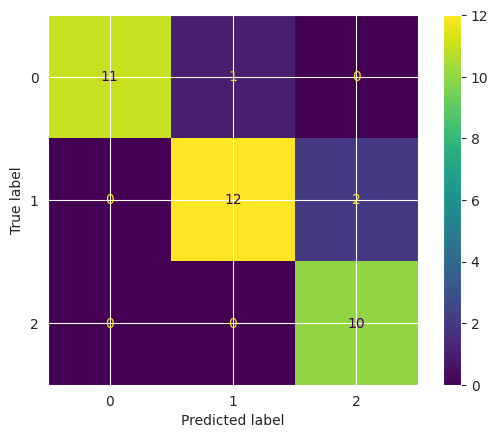

In [5]:
ab = AdaBoostClassifier(n_estimators=10)
ab.fit(X_train_wine, y_train_wine)
predictions = ab.predict(X_test_wine)
result = accuracy_score(y_test_wine, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for WINE dataset:")
print(classification_report(y_test_wine, predictions))

cm = confusion_matrix(y_test_wine, predictions, labels=ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()

Learning rate set to 0.5
0:	learn: 0.6914157	total: 51.5ms	remaining: 463ms
1:	learn: 0.4718243	total: 53.8ms	remaining: 215ms
2:	learn: 0.3591416	total: 57.6ms	remaining: 134ms
3:	learn: 0.2810154	total: 61.9ms	remaining: 92.8ms
4:	learn: 0.2236780	total: 62.6ms	remaining: 62.6ms
5:	learn: 0.1851063	total: 64.9ms	remaining: 43.3ms
6:	learn: 0.1597253	total: 66.2ms	remaining: 28.4ms
7:	learn: 0.1391597	total: 67.7ms	remaining: 16.9ms
8:	learn: 0.1203968	total: 68.8ms	remaining: 7.64ms
9:	learn: 0.1070284	total: 69.9ms	remaining: 0us

Test results:

Accuracy: 0.9722222222222222

Classification Report for WINE dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97      

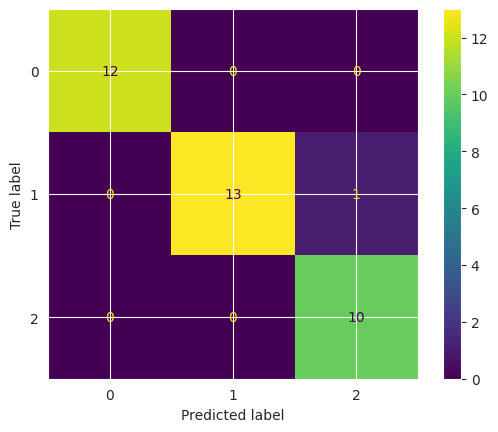

In [6]:
cb = CatBoostClassifier(n_estimators=10)
cb.fit(X_train_wine, y_train_wine)
predictions = cb.predict(X_test_wine)
result = accuracy_score(y_test_wine, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for WINE dataset:")
print(classification_report(y_test_wine, predictions))

cm = confusion_matrix(y_test_wine, predictions, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cb.classes_)
disp.plot()

### Data analysis

In [7]:
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

X_diabetes = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y_diabetes = diabetes_130_us_hospitals_for_years_1999_2008.data.targets
diabetes = pd.concat([X_diabetes, y_diabetes], axis=1)
diabetes.head(10)

/home/mindflayer/miniconda3/envs/um/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
print(diabetes.shape)

(101766, 48)


In [9]:
diabetes = diabetes.sample(frac=0.2)
print(diabetes.shape)

(20353, 48)


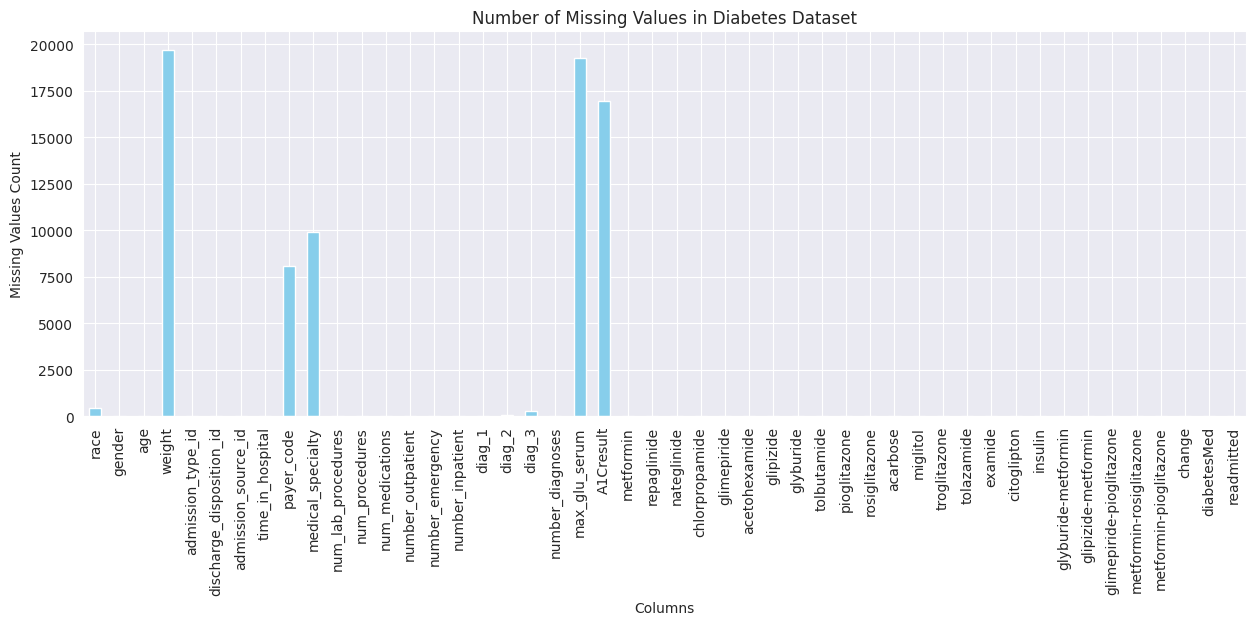

In [10]:
null_counts = diabetes.isnull().sum()
plt.figure(figsize=(15, 5))
null_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Missing Values in Diabetes Dataset')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=90)
plt.show()

In [11]:
diabetes_dropped = diabetes.drop(columns=["weight", "max_glu_serum", "A1Cresult"])
diabetes_dropped = diabetes_dropped.drop_duplicates()
diabetes_dropped.shape

(20353, 45)

In [12]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(*(diabetes_dropped.iloc[:, :-1], diabetes_dropped.iloc[:, -1]), test_size=0.2, stratify=diabetes_dropped.iloc[:, -1])
print(X_train_diabetes.shape)

(16282, 44)


In [58]:
categorical_cols = ["race","gender", "age", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3", "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"]

In [14]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=True).fit(X_train_diabetes.loc[:,categorical_cols])

In [15]:
encoded_sparse_train = encoder.transform(X_train_diabetes[categorical_cols])
encoded_dense_train = encoded_sparse_train.toarray()
encoded_sparse_test = encoder.transform(X_test_diabetes[categorical_cols])
encoded_dense_test = encoded_sparse_test.toarray()

In [16]:
imputer = KNNImputer(n_neighbors=5)

numerical_cols = X_train_diabetes.drop(columns=categorical_cols).columns
X_numeric_train = X_train_diabetes[numerical_cols].to_numpy()
X_numeric_test = X_test_diabetes[numerical_cols].to_numpy()
X_full_train = np.hstack([X_numeric_train, encoded_dense_train])
X_full_test = np.hstack([X_numeric_test, encoded_dense_test])

X_imputed_train = imputer.fit_transform(X_full_train)
X_imputed_test = imputer.transform(X_full_test)

In [17]:
print(X_imputed_train.shape)
print(X_imputed_test.shape)

(16282, 1729)
(4071, 1729)


<Axes: ylabel='class distribution'>

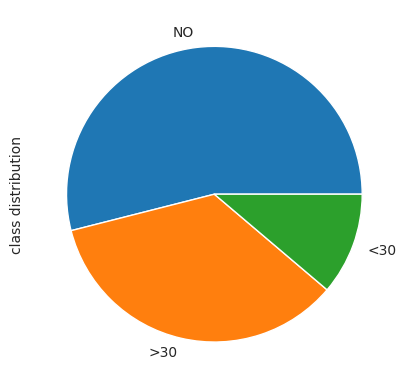

In [18]:
y_train_diabetes.value_counts().plot(kind='pie', ylabel="class distribution")

In [19]:
y_train = y_train_diabetes.str.strip().str.upper().map({
    '<30': 1,
    '>30': 1,
    'NO': 0
})
y_test = y_test_diabetes.str.strip().str.upper().map({
    '<30': 1,
    '>30': 1,
    'NO': 0
})


Test results:

Accuracy: 0.6283468435273889

Classification Report for Diabetes dataset:
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      2197
           1       0.62      0.49      0.55      1874

    accuracy                           0.63      4071
   macro avg       0.63      0.62      0.62      4071
weighted avg       0.63      0.63      0.62      4071



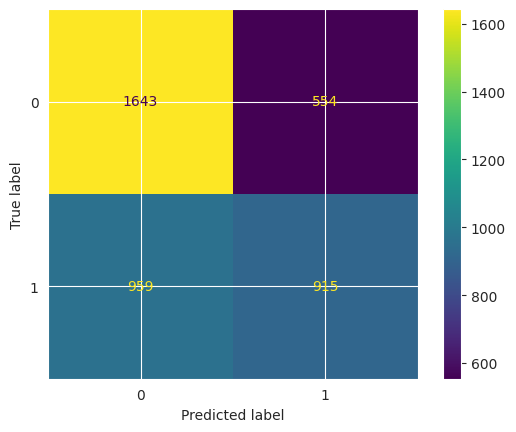

In [20]:
rf = RandomForestClassifier()
rf.fit(X_imputed_train, y_train)
predictions = rf.predict(X_imputed_test)
result = accuracy_score(y_test, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for Diabetes dataset:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()


Test results:

Accuracy: 0.6253991648243675

Classification Report for Diabetes dataset:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69      2197
           1       0.63      0.45      0.53      1874

    accuracy                           0.63      4071
   macro avg       0.63      0.61      0.61      4071
weighted avg       0.63      0.63      0.61      4071



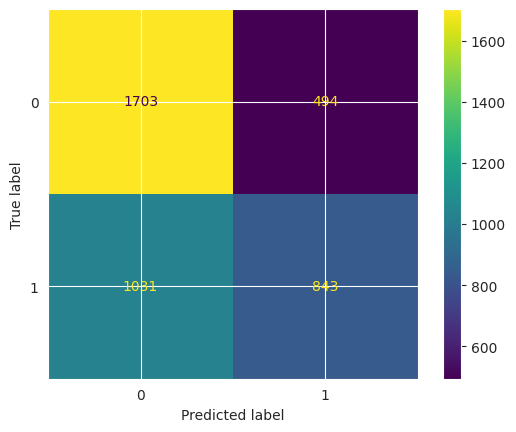

In [21]:
ab = AdaBoostClassifier()
ab.fit(X_imputed_train, y_train)
predictions = ab.predict(X_imputed_test)
result = accuracy_score(y_test, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for Diabetes dataset:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions, labels=ab.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ab.classes_)
disp.plot()


Test results:

Accuracy: 0.6369442397445345

Classification Report for WINE dataset:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      2197
           1       0.63      0.50      0.56      1874

    accuracy                           0.64      4071
   macro avg       0.64      0.63      0.63      4071
weighted avg       0.64      0.64      0.63      4071



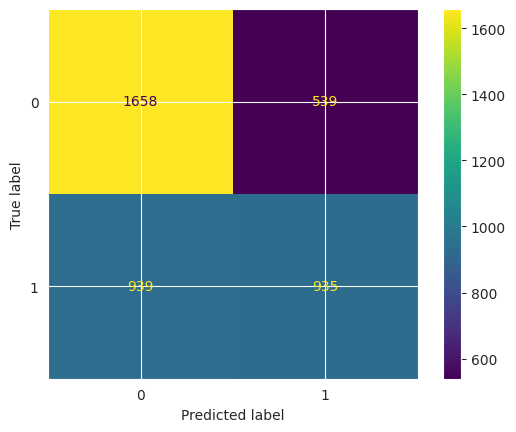

In [22]:
cb = CatBoostClassifier(verbose=0, task_type="GPU")
cb.fit(X_imputed_train, y_train)
predictions = cb.predict(X_imputed_test)
result = accuracy_score(y_test, predictions)
print("\nTest results:")
print("\nAccuracy:", result)
print("\nClassification Report for WINE dataset:")
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions, labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cb.classes_)
disp.plot()

## Hyperparameters
### n_estimators

In [23]:
n_estimators_cat = [1, 50, 100, 200, 500, 1000]
scores_cat = []

for n in n_estimators_cat:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = CatBoostClassifier(verbose=0, task_type="GPU", n_estimators=n)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_cat.append(f1_scores)

In [24]:
n_estimators_forest = [1, 20, 50, 100, 200, 300]
scores_forest = []

for n in n_estimators_forest:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = RandomForestClassifier(n_estimators=n)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_forest.append(f1_scores)

In [25]:
n_estimators_ada = [1, 20, 50, 100, 200, 300]
scores_ada = []

for n in n_estimators_ada:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = AdaBoostClassifier(n_estimators=n)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_ada.append(f1_scores)

Text(0, 0.5, 'F1-Score')

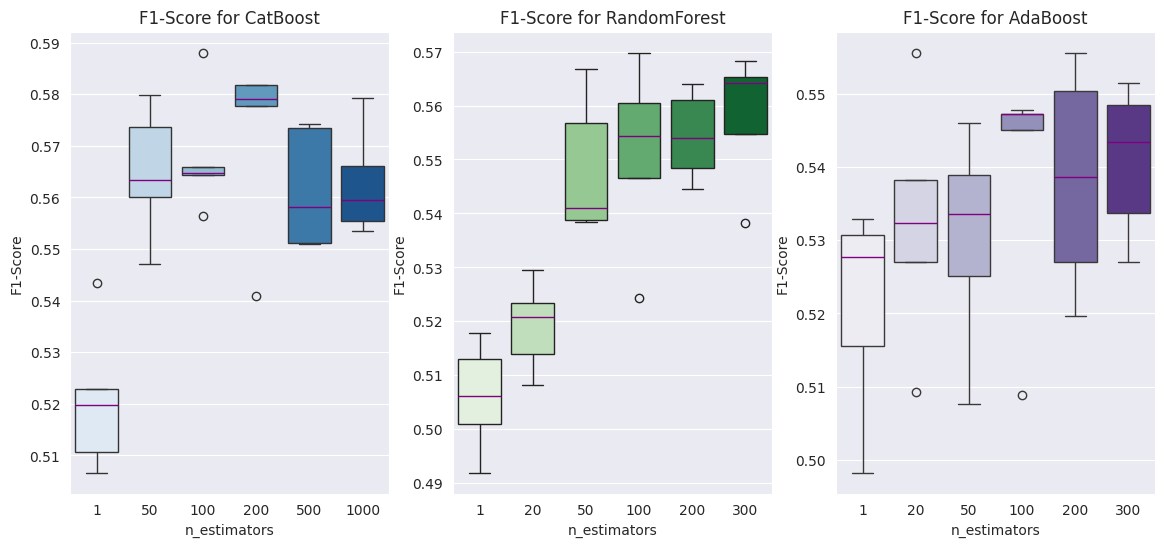

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

sns.boxplot(ax=axes[0], data=scores_cat, palette="Blues", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes[0].set_xticks(range(len(n_estimators_cat)))
axes[0].set_xticklabels([str(d) for d in n_estimators_cat])
axes[0].set_title("F1-Score for CatBoost")
axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("F1-Score")

sns.boxplot(ax=axes[1], data=scores_forest, palette="Greens", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes[1].set_xticks(range(len(n_estimators_forest)))
axes[1].set_xticklabels([str(d) for d in n_estimators_forest])
axes[1].set_title("F1-Score for RandomForest")
axes[1].set_xlabel("n_estimators")
axes[1].set_ylabel("F1-Score")

sns.boxplot(ax=axes[2], data=scores_ada, palette="Purples", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes[2].set_xticks(range(len(n_estimators_ada)))
axes[2].set_xticklabels([str(d) for d in n_estimators_ada])
axes[2].set_title("F1-Score for AdaBoost")
axes[2].set_xlabel("n_estimators")
axes[2].set_ylabel("F1-Score")

### AdaBoost learning_rate

In [27]:
learning_rate = [0.01, 0.05, 0.1, 0.5, 1.0, 2.0]
scores_ada_lr = []

for lr in learning_rate:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_ada_lr.append(f1_scores)

Text(0, 0.5, 'F1-Score')

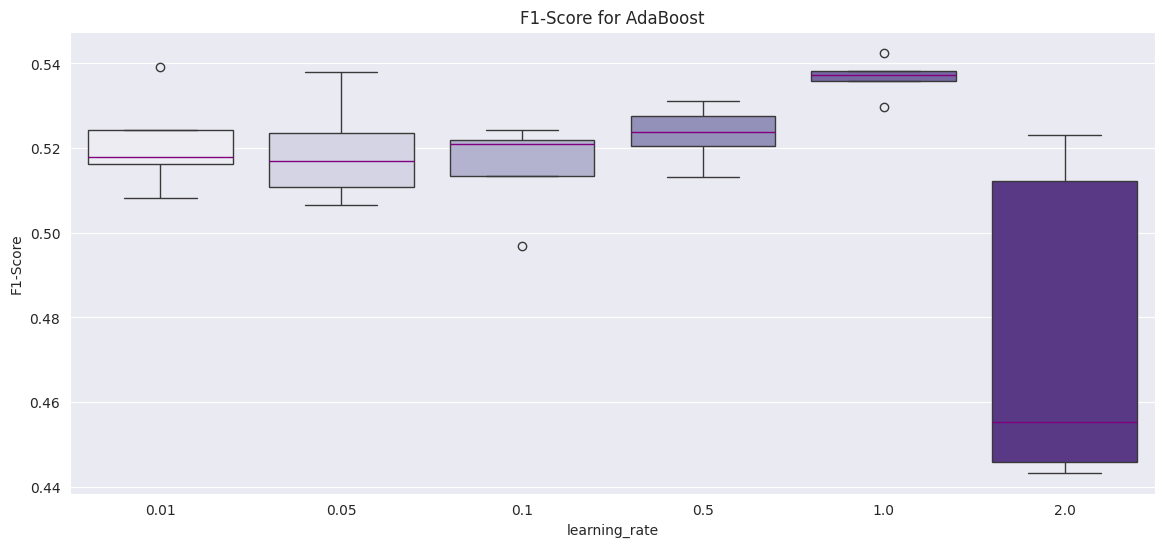

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

sns.boxplot(ax=axes, data=scores_ada_lr, palette="Purples", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes.set_xticks(range(len(learning_rate)))
axes.set_xticklabels([str(d) for d in learning_rate])
axes.set_title("F1-Score for AdaBoost")
axes.set_xlabel("learning_rate")
axes.set_ylabel("F1-Score")

### Random Forest class_weight

In [29]:
precision_binary = make_scorer(precision_score, average="binary", zero_division=0, pos_label=1)
recall_binary = make_scorer(recall_score, average="binary", zero_division=0, pos_label=1)

scoring_forest = {
    "precision": precision_binary,
    "recall": recall_binary,
    "f1": "f1"
}
class_weight = [None, {0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 20}, "balanced"]
precision_scores_forest_weight = []
recall_scores_forest_weight = []
f1_scores_forest_weight = []

for weight in class_weight:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = RandomForestClassifier(n_estimators=100, class_weight=weight)
    scores = cross_validate(model, X_imputed_train, y_train, cv=cv, scoring=scoring_forest)
    precision_scores_forest_weight.append(scores["test_precision"])
    recall_scores_forest_weight.append(scores["test_recall"])
    f1_scores_forest_weight.append(scores["test_f1"])

In [30]:
precision_scores_tree_weight = []
recall_scores_tree_weight = []
f1_scores_tree_weight = []

for weight in class_weight:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = DecisionTreeClassifier(class_weight=weight)
    scores = cross_validate(model, X_imputed_train, y_train, cv=cv, scoring=scoring_forest)
    precision_scores_tree_weight.append(scores["test_precision"])
    recall_scores_tree_weight.append(scores["test_recall"])
    f1_scores_tree_weight.append(scores["test_f1"])

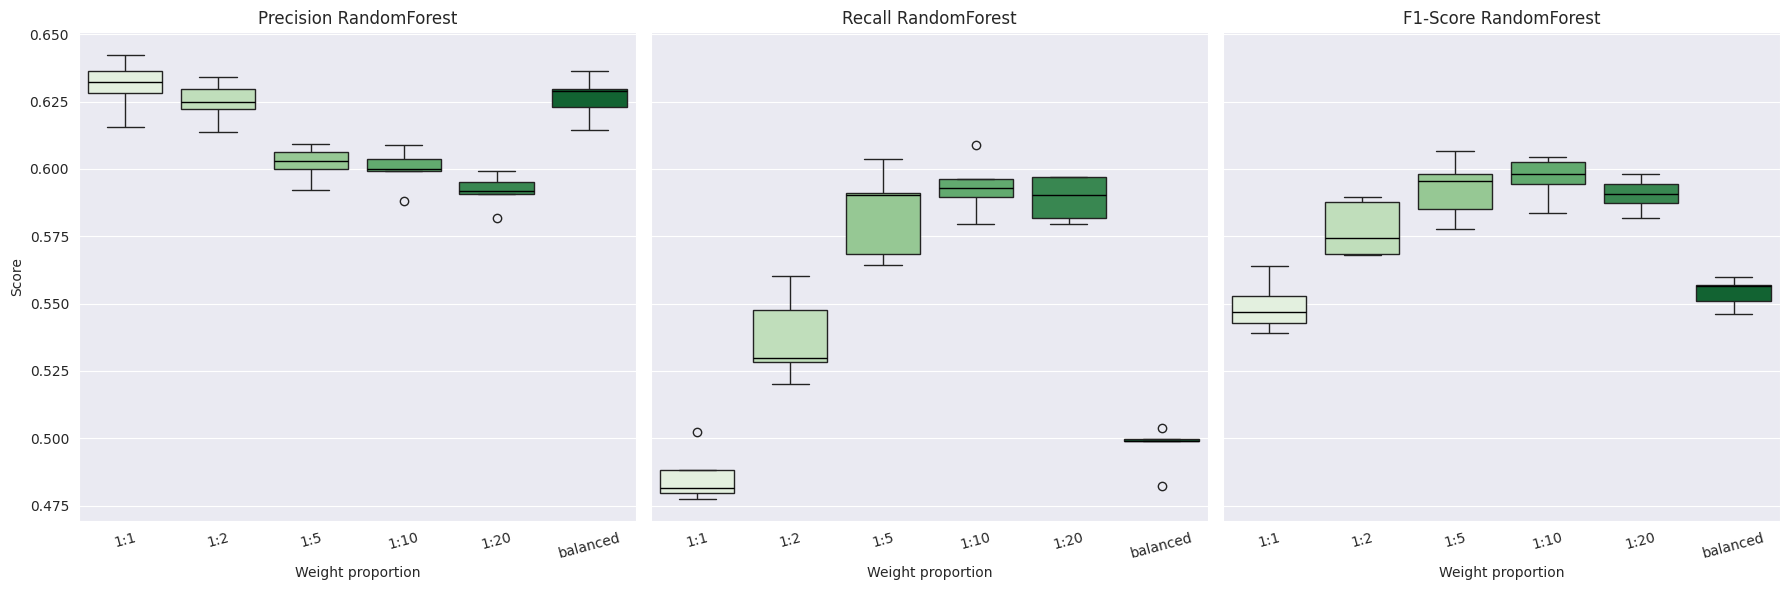

In [31]:
class_weight_labels = ["1:1", "1:2", "1:5", "1:10", "1:20", "balanced"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(ax=axes[0],data=precision_scores_forest_weight,palette="Greens",medianprops={'color': 'black'})
axes[0].set_title("Precision RandomForest")
axes[0].set_xlabel("Weight proportion")
axes[0].set_ylabel("Score")
axes[0].set_xticks(range(len(class_weight_labels)))
axes[0].set_xticklabels(class_weight_labels, rotation=15)

sns.boxplot(ax=axes[1],data=recall_scores_forest_weight,palette="Greens",medianprops={'color': 'black'})
axes[1].set_title("Recall RandomForest")
axes[1].set_xlabel("Weight proportion")
axes[1].set_xticks(range(len(class_weight_labels)))
axes[1].set_xticklabels(class_weight_labels, rotation=15)

sns.boxplot(ax=axes[2],data=f1_scores_forest_weight,palette="Greens",medianprops={'color': 'black'})
axes[2].set_title("F1-Score RandomForest")
axes[2].set_xlabel("Weight proportion")
axes[2].set_xticks(range(len(class_weight_labels)))
axes[2].set_xticklabels(class_weight_labels, rotation=15)

plt.tight_layout()
plt.show()

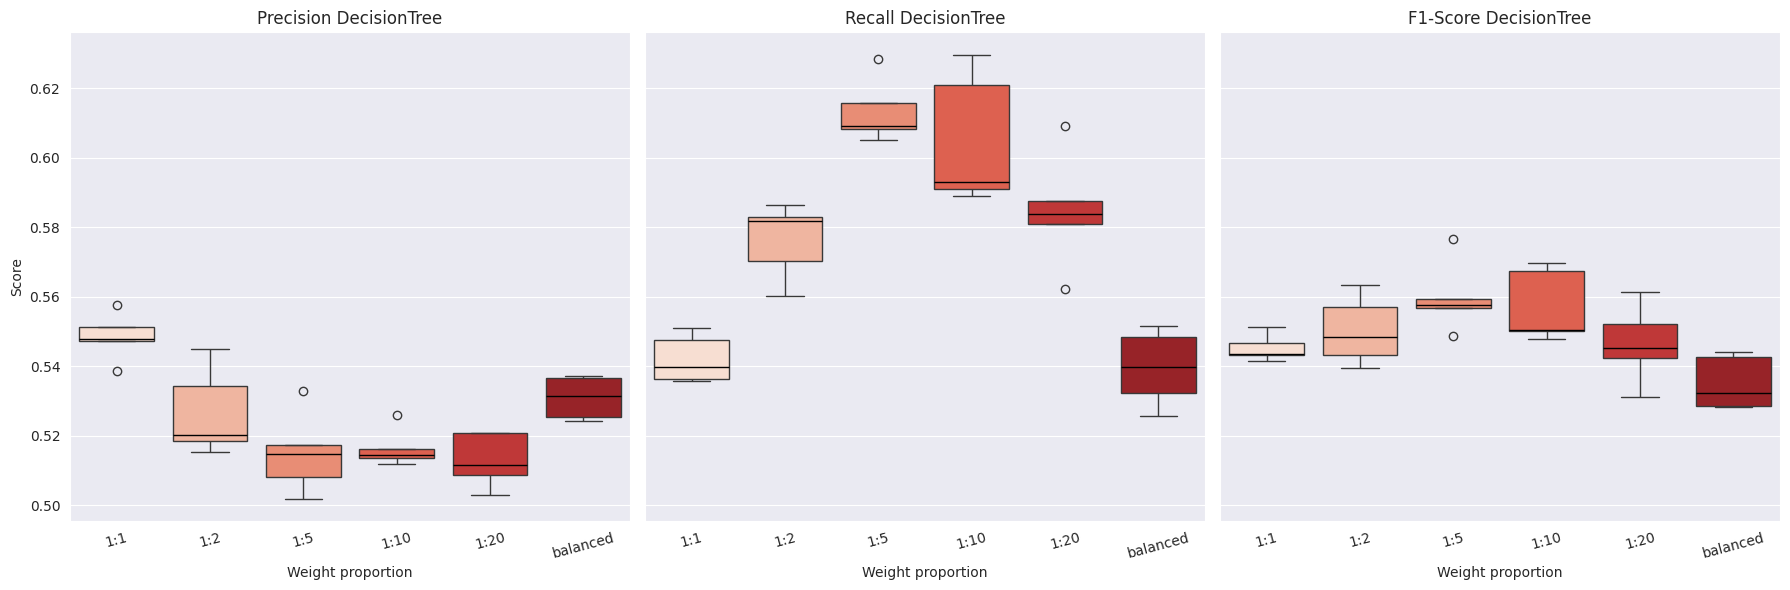

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.boxplot(ax=axes[0],data=precision_scores_tree_weight,palette="Reds",medianprops={'color': 'black'})
axes[0].set_title("Precision DecisionTree")
axes[0].set_xlabel("Weight proportion")
axes[0].set_ylabel("Score")
axes[0].set_xticks(range(len(class_weight_labels)))
axes[0].set_xticklabels(class_weight_labels, rotation=15)

sns.boxplot(ax=axes[1],data=recall_scores_tree_weight,palette="Reds",medianprops={'color': 'black'})
axes[1].set_title("Recall DecisionTree")
axes[1].set_xlabel("Weight proportion")
axes[1].set_xticks(range(len(class_weight_labels)))
axes[1].set_xticklabels(class_weight_labels, rotation=15)

sns.boxplot(ax=axes[2],data=f1_scores_tree_weight,palette="Reds",medianprops={'color': 'black'})
axes[2].set_title("F1-Score DecisionTree")
axes[2].set_xlabel("Weight proportion")
axes[2].set_xticks(range(len(class_weight_labels)))
axes[2].set_xticklabels(class_weight_labels, rotation=15)

plt.tight_layout()
plt.show()

### min_data_in_leaf

In [33]:
min_data_leaf = [1, 5, 10, 20, 50, 100]
scores_cat_leaf = []

for m in min_data_leaf:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = CatBoostClassifier(verbose=0, task_type="GPU", n_estimators=100, min_data_in_leaf=m)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_cat_leaf.append(f1_scores)

In [34]:
min_data_leaf = [1, 5, 10, 20, 50, 100]
scores_tree_leaf = []

for m in min_data_leaf:
    cv = StratifiedKFold(n_splits=5, shuffle=True)
    model = DecisionTreeClassifier(min_samples_leaf=m)
    f1_scores = cross_val_score(model, X_imputed_train, y_train, cv=cv, scoring="f1")
    scores_tree_leaf.append(f1_scores)

Text(0, 0.5, 'F1-Score')

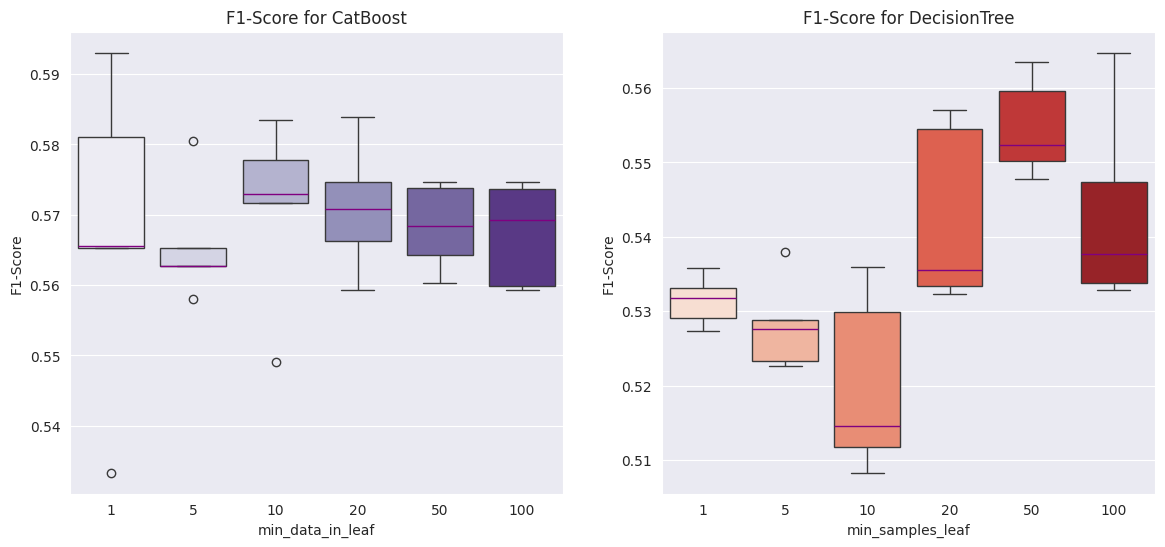

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], data=scores_cat_leaf, palette="Purples", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes[0].set_xticks(range(len(min_data_leaf)))
axes[0].set_xticklabels([str(d) for d in min_data_leaf])
axes[0].set_title("F1-Score for CatBoost")
axes[0].set_xlabel("min_data_in_leaf")
axes[0].set_ylabel("F1-Score")

sns.boxplot(ax=axes[1], data=scores_tree_leaf, palette="Reds", medianprops={'color': 'purple', 'ls': '-', 'lw': 1})
axes[1].set_xticks(range(len(min_data_leaf)))
axes[1].set_xticklabels([str(d) for d in min_data_leaf])
axes[1].set_title("F1-Score for DecisionTree")
axes[1].set_xlabel("min_samples_leaf")
axes[1].set_ylabel("F1-Score")

### Performance & Fairness

#### Performance

In [152]:
models = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0, task_type="GPU")
}

scoring_metrics = {
    'F1': 'f1',
    'Precision': 'precision',
    'Recall': 'recall'
}

results = []

for name, model in models.items():
    model_result = {'Model': name}
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X_imputed_train, y_train, cv=5, scoring=scoring)
        model_result[f'{metric_name}_mean'] = scores.mean()
        model_result[f'{metric_name}_std'] = scores.std()
    results.append(model_result)

results_df = pd.DataFrame(results)
results_df.to_csv("model_comparison_results.csv", index=False)

In [156]:
print("\nModel Comparison Results:")
print(tabulate.tabulate(results_df, headers="keys", tablefmt="simple", showindex=False))


Model Comparison Results:
Model           F1_mean      F1_std    Precision_mean    Precision_std    Recall_mean    Recall_std
------------  ---------  ----------  ----------------  ---------------  -------------  ------------
RandomForest   0.550116  0.0071403           0.635209       0.00774837       0.486991    0.0075357
AdaBoost       0.533086  0.0048014           0.635693       0.0113839        0.459106    0.00540978
CatBoost       0.557413  0.00954057          0.639157       0.00595087       0.492595    0.0132122


#### Preprocessing for fairness

In [ ]:
sensitive_features_test = X_test_diabetes[['race', 'gender', 'age', 'payer_code']]
sensitive_imputer = SimpleImputer(strategy='most_frequent')
sensitive_features_test[['race', 'gender', 'age', 'payer_code']] = sensitive_imputer.fit_transform(
    sensitive_features_test[['race', 'gender', 'age', 'payer_code']]
)

In [68]:
categorical_cols_fairness = [col for col in categorical_cols if col not in ['race', 'gender', 'age', 'payer_code']]

encoder_fairness = OneHotEncoder(handle_unknown="ignore", sparse_output=True).fit(X_train_diabetes.loc[:, categorical_cols_fairness])
encoded_sparse_train_fairness = encoder_fairness.transform(X_train_diabetes[categorical_cols_fairness])
encoded_dense_train_fairness = encoded_sparse_train_fairness.toarray()
encoded_sparse_test_fairness = encoder_fairness.transform(X_test_diabetes[categorical_cols_fairness])
encoded_dense_test_fairness = encoded_sparse_test_fairness.toarray()
imputer_fairness = KNNImputer(n_neighbors=5)

numerical_cols_fairness = X_train_diabetes.drop(columns=categorical_cols).columns
X_numeric_train_fairness = X_train_diabetes[numerical_cols_fairness].to_numpy()
X_numeric_test_fairness = X_test_diabetes[numerical_cols_fairness].to_numpy()
X_full_train_fairness = np.hstack([X_numeric_train_fairness, encoded_dense_train_fairness])
X_full_test_fairness = np.hstack([X_numeric_test_fairness, encoded_dense_test_fairness])

X_imputed_train_fairness = imputer_fairness.fit_transform(X_full_train_fairness)
X_imputed_test_fairness = imputer_fairness.transform(X_full_test_fairness)

In [98]:
def save_fairness_results(fairness_results, output_dir="fairness_results"):
    os.makedirs(output_dir, exist_ok=True)

    for feature, results_df in fairness_results.items():
        filename = os.path.join(output_dir, f"fairness_results_{feature}.csv")
        results_df.to_csv(filename)

In [97]:
def load_fairness_results(output_dir="fairness_results", prefix="fairness_results_"):
    loaded_results = {}
    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(output_dir):
        if filename.endswith(".csv") and filename.startswith(prefix):
            feature = filename.replace(prefix, "").replace(".csv", "")
            filepath = os.path.join(output_dir, filename)
            df = pd.read_csv(filepath, index_col=0)
            loaded_results[feature] = df
            print(f"Loaded results for {feature} from {filepath}")

    return loaded_results

In [115]:
def perform_fairness_tests(metrics, sensitive_features, y_test, y_pred):
    fairness_results = {}
    for feature in sensitive_features.columns:
        mf = MetricFrame(
            metrics=metrics,
            y_true=y_test,
            y_pred=y_pred,
            sensitive_features=sensitive_features[feature]
        )
        fairness_results[feature] = mf.by_group
    return fairness_results

In [103]:
metrics = {
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, zero_division=0),
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, zero_division=0),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, zero_division=0),
}

#### Fairness Random Forest

In [129]:
rf = RandomForestClassifier()
rf.fit(X_imputed_train_fairness, y_train)
y_pred_forest = rf.predict(X_imputed_test_fairness)

In [130]:
fairness_results_forest = perform_fairness_tests(metrics, sensitive_features_test, y_test, y_pred_forest)

In [131]:
save_fairness_results(fairness_results_forest, "fairness_results_forest")

In [132]:
for feature, results in fairness_results_forest.items():
    print(f"Results for sensitive feature: {feature}")
    print(results)
    print("\n" + "="*50 + "\n")

Results for sensitive feature: race
                       F1  Precision    Recall
race                                          
AfricanAmerican  0.531685   0.589041  0.484507
Asian            0.526316   0.555556  0.500000
Caucasian        0.566603   0.636756  0.510373
Hispanic         0.617647   0.700000  0.552632
Other            0.487805   0.625000  0.400000


Results for sensitive feature: gender
              F1  Precision    Recall
gender                               
Female  0.567033   0.627737  0.517034
Male    0.551282   0.628655  0.490868


Results for sensitive feature: age
                F1  Precision    Recall
age                                    
[0-10)    0.000000   0.000000  0.000000
[10-20)   0.470588   1.000000  0.307692
[20-30)   0.678571   0.863636  0.558824
[30-40)   0.628571   0.702128  0.568966
[40-50)   0.543131   0.634328  0.474860
[50-60)   0.575646   0.641975  0.521739
[60-70)   0.554318   0.629747  0.495025
[70-80)   0.548319   0.617021  0.493384
[80-90

#### Fairness Ada Boost

In [125]:
ada = AdaBoostClassifier()
ada.fit(X_imputed_train_fairness, y_train)
y_pred_ada = ada.predict(X_imputed_test_fairness)

In [126]:
fairness_results_ada = perform_fairness_tests(metrics, sensitive_features_test, y_test, y_pred_ada)

In [127]:
save_fairness_results(fairness_results_ada, "fairness_results_ada")

In [128]:
for feature, results in fairness_results_ada.items():
    print(f"Results for sensitive feature: {feature}")
    print(results)
    print("\n" + "="*50 + "\n")

Results for sensitive feature: race
                       F1  Precision    Recall
race                                          
AfricanAmerican  0.544571   0.641221  0.473239
Asian            0.600000   0.600000  0.600000
Caucasian        0.526818   0.619048  0.458506
Hispanic         0.695652   0.774194  0.631579
Other            0.444444   0.727273  0.320000


Results for sensitive feature: gender
              F1  Precision    Recall
gender                               
Female  0.544521   0.632626  0.477956
Male    0.520239   0.621236  0.447489


Results for sensitive feature: age
                F1  Precision    Recall
age                                    
[0-10)    0.000000   0.000000  0.000000
[10-20)   0.444444   0.800000  0.307692
[20-30)   0.618182   0.809524  0.500000
[30-40)   0.691589   0.755102  0.637931
[40-50)   0.572347   0.674242  0.497207
[50-60)   0.525097   0.621005  0.454849
[60-70)   0.525108   0.620339  0.455224
[70-80)   0.528177   0.635638  0.451796
[80-90

#### Fairness Cat Boost

In [133]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_imputed_train_fairness, y_train)
y_pred_cat = cat.predict(X_imputed_test_fairness)

In [134]:
fairness_results_cat = perform_fairness_tests(metrics, sensitive_features_test, y_test, y_pred_cat)

In [ ]:
save_fairness_results(fairness_results_cat, "fairness_results_cat")

In [135]:
for feature, results in fairness_results_cat.items():
    print(f"Results for sensitive feature: {feature}")
    print(results)
    print("\n" + "="*50 + "\n")

Results for sensitive feature: race
                       F1  Precision    Recall
race                                          
AfricanAmerican  0.563863   0.630662  0.509859
Asian            0.526316   0.555556  0.500000
Caucasian        0.572948   0.635750  0.521438
Hispanic         0.657534   0.685714  0.631579
Other            0.410256   0.571429  0.320000


Results for sensitive feature: gender
              F1  Precision    Recall
gender                               
Female  0.591304   0.646081  0.545090
Male    0.546965   0.621190  0.488584


Results for sensitive feature: age
                F1  Precision    Recall
age                                    
[0-10)    0.000000   0.000000  0.000000
[10-20)   0.500000   0.714286  0.384615
[20-30)   0.690909   0.904762  0.558824
[30-40)   0.722222   0.780000  0.672414
[40-50)   0.574074   0.641379  0.519553
[50-60)   0.571963   0.648305  0.511706
[60-70)   0.565934   0.631902  0.512438
[70-80)   0.552381   0.627404  0.493384
[80-90

In [ ]:
for feature in sensitive_features_test.columns:
    print(f"Comparison for sensitive feature: {feature}")

    df1 = pd.DataFrame(fairness_results_forest[feature]).add_prefix('Forest_')
    df2 = pd.DataFrame(fairness_results_ada[feature]).add_prefix('Ada_')
    df3 = pd.DataFrame(fairness_results_cat[feature]).add_prefix('Cat_')

    combined = pd.concat([df1, df2, df3], axis=1)

    print(combined.to_string())
    print("\n" + "="*50 + "\n")


In [145]:
for feature in sensitive_features_test.columns:
    print(f"Comparison for sensitive feature: {feature}\n")

    df1 = pd.DataFrame(fairness_results_forest[feature]).add_prefix('Forest_')
    df2 = pd.DataFrame(fairness_results_ada[feature]).add_prefix('Ada_')
    df3 = pd.DataFrame(fairness_results_cat[feature]).add_prefix('Cat_')

    combined = pd.concat([df1, df2, df3], axis=1)

    print(tabulate.tabulate(combined, headers='keys', tablefmt='psql'))
    print("\n" + "="*80 + "\n")

Comparison for sensitive feature: race

+-----------------+-------------+--------------------+-----------------+----------+-----------------+--------------+----------+-----------------+--------------+
| race            |   Forest_F1 |   Forest_Precision |   Forest_Recall |   Ada_F1 |   Ada_Precision |   Ada_Recall |   Cat_F1 |   Cat_Precision |   Cat_Recall |
|-----------------+-------------+--------------------+-----------------+----------+-----------------+--------------+----------+-----------------+--------------|
| AfricanAmerican |    0.531685 |           0.589041 |        0.484507 | 0.544571 |        0.641221 |     0.473239 | 0.563863 |        0.630662 |     0.509859 |
| Asian           |    0.526316 |           0.555556 |        0.5      | 0.6      |        0.6      |     0.6      | 0.526316 |        0.555556 |     0.5      |
| Caucasian       |    0.566603 |           0.636756 |        0.510373 | 0.526818 |        0.619048 |     0.458506 | 0.572948 |        0.63575  |     0.521